In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
X, y = boston.data, boston.target

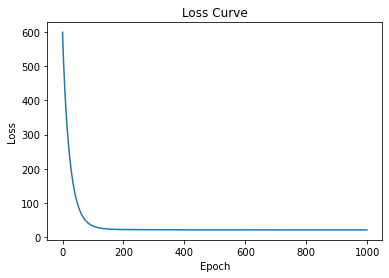

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

# 加载数据
boston = load_boston()
X, y = boston.data, boston.target

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 转换为Tensor
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# 定义模型
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

# 实例化模型
model = LinearRegressionModel(input_size=X_tensor.shape[1])

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 训练模型
epochs = 1000
losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# 绘制损失曲线
plt.plot(losses)
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()